In [1]:


%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from numpy.matlib import repmat
import cvxpy as cvx
import gurobipy as grb


import scipy as sp
import scipy.optimize

import matplotlib.image as mpimg



In [4]:
import numpy as np
cities = ['Atlanta','Boston', 'Calgary', 'Charleston','Chicago','Dallas', 
          'Denver', 'Duluth', 'ElPaso','Helena', 'Houston', 'KansasCity', 'LasVegas',
          'LittleRock', 'LosAngeles', 'Miami', 'Montreal', 'Nashville',
          'NewOrleans', 'NewYork', 'OklahomaCity', 'Omaha', 'Phoenix',
          'Pittsburgh', 'Portland', 'Raleigh', 'SaintLouis','SaltLakeCity',
          'SanFrancisco','SantaFe', 'SaultStMarie', 'Seattle', 'Toronto',
          'Vancouver', 'Washington', 'Winnipeg'];

blue = ['Winnipeg','Helena',4,
    'Portland','SaltLakeCity',6,
    'Omaha','Chicago',4,
    'Montreal','NewYork',3,
    'KansasCity','SaintLouis',2,
    'SantaFe','OklahomaCity',3,
    'Atlanta','Miami',5];

blue = GetMatrix(blue,cities);

white = ['Calgary','Winnipeg',6,
    'Chicago','Toronto',4,
    'SaintLouis','Chicago',2,
    'Pittsburgh','NewYork',2,
    'SanFrancisco','SaltLakeCity',5,
    'Phoenix','Denver',5,
    'LittleRock','Nashville',3];

white = GetMatrix(white,cities);

green = ['Portland','SanFrancisco',5,
    'Helena','Denver',4,
    'SaintLouis','Pittsburgh',5,
    'LittleRock','NewOrleans',3,
    'ElPaso','Houston',6];

green = GetMatrix(green,cities);

red = ['Helena','Omaha',5,
    'Denver','OklahomaCity',4,
    'ElPaso','Dallas',4,
    'NewOrleans','Miami',6,
    'NewYork','Boston',2,
    'Duluth','Chicago',3];

red = GetMatrix(red,cities);

purple = ['Helena','SaltLakeCity',3,
    'Denver','Omaha',4,
    'Duluth','Toronto',6,
    'Charleston','Miami',4,
    'SanFrancisco','LosAngeles',3];
purple = GetMatrix(purple,cities);

orange = ['LasVegas','SaltLakeCity',3,
    'Helena','Duluth',6,
    'Chicago','Pittsburgh',3,
    'Denver','KansasCity',4,
    'NewYork','Washington',2,
    'Atlanta','NewOrleans',4];

orange = GetMatrix(orange,cities);

black = ['LosAngeles','ElPaso',6,
    'Winnipeg','Duluth',4,
    'SaultStMarie','Montreal',5,
    'Nashville','Raleigh',3];

black = GetMatrix(black,cities);

yellow = ['Seattle','Helena',6,
    'ElPaso','OklahomaCity',5,
    'Nashville','Pittsburgh',4];

yellow = GetMatrix(yellow,cities);

gray = ['Vancouver','Seattle',1,
    'Portland','Seattle',1,
    'Vancouver','Calgary',3,
    'Seattle','Calgary',4,
    'Calgary','Helena',4,
    'Winnipeg','SaultStMarie',6,
    'Duluth','SaultStMarie',3,
    'SaultStMarie','Toronto',2,
    'Toronto','Montreal',3,
    'Montreal','Boston',2,
    'Toronto','Pittsburgh',2,
    'LasVegas','LosAngeles',2,
    'LosAngeles','Phoenix',3,
    'Phoenix','ElPaso',3,
    'ElPaso','SantaFe',2,
    'Phoenix','SantaFe',3,
    'SantaFe','Denver',2,
    'Duluth','Omaha',2,
    'Omaha','KansasCity',1,
    'KansasCity','OklahomaCity',2,
    'OklahomaCity','Dallas',2,
    'Dallas','Houston',1,
    'Houston','NewOrleans',2,
    'Dallas','LittleRock',2,
    'OklahomaCity','LittleRock',2,
    'LittleRock','SaintLouis',2,
    'SaintLouis','Nashville',2,
    'Nashville','Atlanta',1,
    'Atlanta','Charleston',2,
    'Charleston','Raleigh',2,
    'Atlanta','Raleigh',2,
    'Raleigh','Washington',2,
    'Raleigh','Pittsburgh',2,
    'Washington','Pittsburgh',2];

gray = GetMatrix(gray,cities);

profit = blue*1.0+white*1.5+green*2.0+red*2.0+purple*2.5+orange*1.0+black*1.0+yellow*2.0+gray*1.0;


#TODO: symmetrize the matrix if necessary by uncommenting the next line
#profit_sym = np.dstack([profit, profit.transpose()]).max(axis=2)

costs = np.ones((len(cities),1))*10;

#TODO put your solution here

In [3]:
def GetMatrix(links,cities):

    A = np.zeros((len(cities), len(cities)));
    for i in range(0, len(links), 3):
        A[cities.index(links[i]), cities.index(links[i + 1])] =  links[i+2]
           
    return A

In [7]:
profit

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  9.],
       ..., 
       [ 0.,  0.,  3., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [5]:
nmb_c = len(cities)

open_cost = 10

city_profit = open_cost - sum(profit[:, 0:nmb_c ])

U = np.zeros((nmb_c + 2, nmb_c + 2))
U[1:(nmb_c + 1), 1: (nmb_c + 1)] = profit


pos = np.arange(nmb_c)[city_profit > 0]
neg = np.arange(nmb_c)[city_profit < 0]

# for source and sink
for i in pos:
    U[0, i + 1] = city_profit[i]
for i in neg:
    U[i + 1, nmb_c + 1] = - city_profit[i]

Optimal value is: 86.0
Opened 27 cities: ['Atlanta', 'Calgary', 'Charleston', 'Chicago', 'Dallas', 'Denver', 'Duluth', 'ElPaso', 'Helena', 'Houston', 'LittleRock', 'LosAngeles', 'Miami', 'Nashville', 'NewOrleans', 'OklahomaCity', 'Omaha', 'Phoenix', 'Pittsburgh', 'Portland', 'SaintLouis', 'SaltLakeCity', 'SanFrancisco', 'SaultStMarie', 'Seattle', 'Toronto', 'Winnipeg']

 Optimal value of year profit is: 25.5


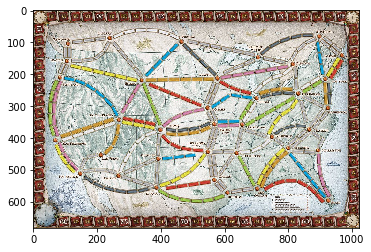

In [6]:
X = cvx.Variable(nmb_c + 2)

f = 0
for i, j in np.ndindex(nmb_c + 2, nmb_c + 2):
    f += U[i, j] * cvx.pos(X[j] - X[i])

objective = cvx.Minimize(f)

constraints = [X >= 0, X <= 1, X[0] == 0, X[-1] == 1]

solution = cvx.Problem(objective, constraints)
solution.solve(solver='GUROBI')

opened_cities = list(np.array(cities)[np.array(X.value).astype(bool)[1:-1].ravel()])
print('Optimal value is: {0}'.format(solution.value))
print("Opened {0} cities: {1}".format(len(opened_cities), opened_cities))

index = [cities.index(city) for city in opened_cities]


year_profit = - open_cost * len(opened_cities)
for i in index:
    for j in index:
        year_profit += profit[i, j] 
print("\n Optimal value of year profit is: {0}".format(year_profit)) 


plt.imshow(mpimg.imread('TicketToRide.png'))